Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos <br>
Primer Semestre 2024
<br>

<h1><center>Tarea 4: Modelos para imágenes y texto </center></h1>
        Profesor: Marcelo Mendoza<br>
        Fecha de entrega: 09 de junio de 2024

## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas.
- El notebook debe tener todas las celdas de código ejecutadas.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

---

## Librerías

In [1]:
#Cargue las liberías que va a utilizar

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import collections
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
import random
from sklearn import feature_extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Sección 1: Clasificación de imágenes (30 puntos)

Para esta primera sección se utilizará el dataset de imágenes **MNIST**. Este conjunto de datos incluye números escritos manualmente, entre 0 y 9.

Cada imágen tiene una dimensión de 28x28 y está en blanco y negro. Es decir, una imagen se ve representada como un arreglo de dimensión (28, 28).

Más información: http://yann.lecun.com/exdb/mnist/

## Parte 1: Carga de datos y procesamiento (5 puntos)

### 1.1 Importe el dataset y analicelo (4 puntos)  

* Indique el número de imágenes que posee el conjunto de datos. ¿Las clases están balanceadas?
* Muestre dos imágenes de cada clase.


In [2]:
#Entregar esta celda
#Cargar dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#Normalización
x_train = x_train / 255
x_test = x_test / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


RESPUESTA:

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Como se ve, hay 60000 datos de entrenamiento y 10000 de testeo.

In [4]:
im_0 = x_train[0]
im_1 = x_train[1]

In [5]:
collections.Counter(y_train)

Counter({np.uint8(1): 6742,
         np.uint8(7): 6265,
         np.uint8(3): 6131,
         np.uint8(2): 5958,
         np.uint8(9): 5949,
         np.uint8(0): 5923,
         np.uint8(6): 5918,
         np.uint8(8): 5851,
         np.uint8(4): 5842,
         np.uint8(5): 5421})

In [6]:
collections.Counter(y_test)

Counter({np.uint8(1): 1135,
         np.uint8(2): 1032,
         np.uint8(7): 1028,
         np.uint8(3): 1010,
         np.uint8(9): 1009,
         np.uint8(4): 982,
         np.uint8(0): 980,
         np.uint8(8): 974,
         np.uint8(6): 958,
         np.uint8(5): 892})

En general las clases están balanceadas.

In [7]:
claves = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}
for i in range(60000):
    claves[y_train[i]].append(x_train[i])

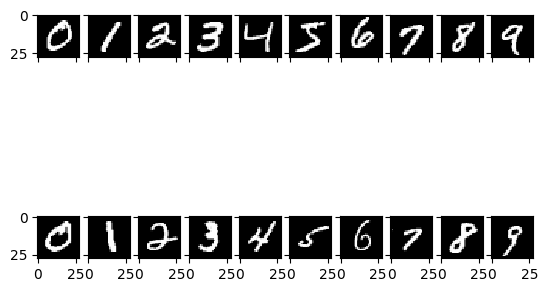

In [8]:
import matplotlib.pyplot as plt

rows, cols = 2, 10
fig, ax = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row')

for row in range(rows):
    for col in range(cols):
        ax[row, col].imshow(claves[col][row], interpolation='nearest', cmap="Greys_r")

plt.show()

### 1.2 Creación de validación (1 punto)

Utilizando el conjunto train, construya un conjunto de validación (10%).


RESPUESTA:

In [9]:
x_val = x_train[: 6000]
y_val = y_train[: 6000]
x_train = x_train[6000: ]
y_train = y_train[6000: ]

## Parte 2: Crear clasificadores utilizando Convolutional Neural Network (CNN) (25 puntos)

### 2.1 Crear clasificador CNN (10 puntos)

* Entrene un clasificador multiclase para discriminar entre los diez dígitos del dataset. Considere 3 épocas y batch_size=64.

* Grafique las curvas de accuracy para los conjuntos train y validation.
Comente.
* Grafique las funciones de pérdida para los conjuntos train y validation. Comente.

* Utilizando el conjunto de test, calcule las métricas F1-score, precision y recall para cada clase. Comente.

**Observaciones**

* Considere que el número de parámetros de la red puede hacer más lento el proceso de entrenamiento.

* Si utiliza CPU podría demorar entre 4 y 7 minutos por época. En este caso, no tiene límite de tiempo de uso.

* Si utiliza GPU puede acelerar el proceso de entrenamiento significativamente (menos de 1 minuto en total). Google Colab entrega este tipo de recursos de manera gratuita. Para activar la GPU debe ir a la sección **Entorno de ejecución** --> **Cambiar tipo de entorno de ejecución** y seleccionar la opción **T4 GPU**. Considere que el tiempo de uso es limitado.


RESPUESTA:

El código demora alrededor de 8-10 minutos.

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

/Users/diego/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [12]:
x_train_fix = x_train.reshape(-1, 28, 28, 1)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=10, 
    zoom_range=0.1, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=False, 
    vertical_flip=False 
)
datagen.fit(x_train_fix)

In [15]:
history = model.fit(
    datagen.flow(x_train_fix, y_train, batch_size=64),
    epochs=3,
    validation_data=(x_val, y_val),
    verbose=2,
    steps_per_epoch=x_train.shape[0] // 64,
    callbacks=[learning_rate_reduction]
)

Epoch 1/3


/Users/diego/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


843/843 - 47s - 56ms/step - accuracy: 0.8922 - loss: 0.3352 - val_accuracy: 0.9812 - val_loss: 0.0605 - learning_rate: 1.0000e-03
Epoch 2/3


/Users/diego/miniconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


843/843 - 2s - 2ms/step - accuracy: 1.0000 - loss: 0.0482 - val_accuracy: 0.9808 - val_loss: 0.0629 - learning_rate: 1.0000e-03
Epoch 3/3
843/843 - 49s - 58ms/step - accuracy: 0.9662 - loss: 0.1121 - val_accuracy: 0.9888 - val_loss: 0.0387 - learning_rate: 1.0000e-03


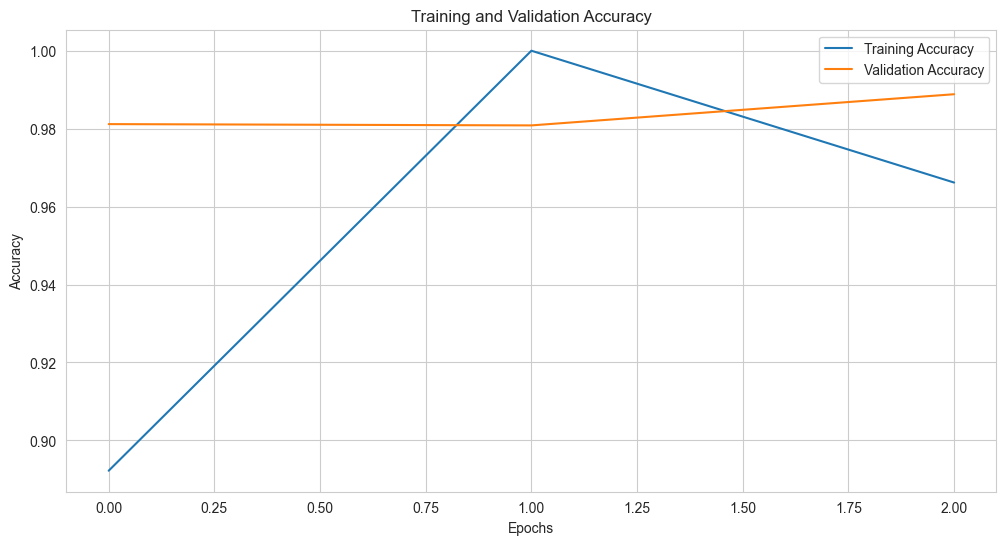

In [16]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Se puede ver que mientras más epochs, mejor precisión tiene el modelo. Esto se ajusta a lo que se vió en clases.

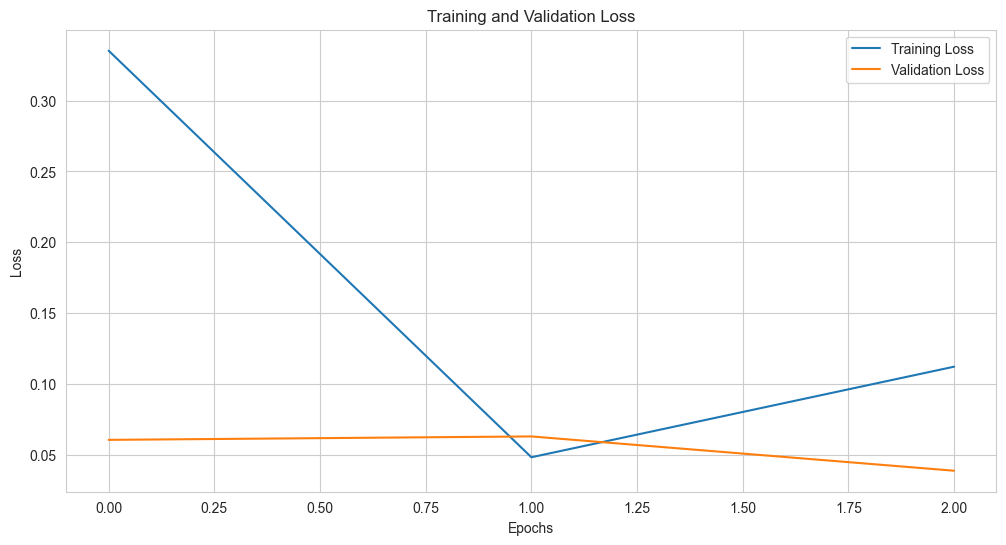

In [17]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Se ve que la tendencia de la pérdida es decrecer a medida que aumentan los Epochs. Esto también calza con lo visto en clases.

In [18]:
Y_preds = model.predict(x_test).argmax(axis=-1)

print("Test Accuracy : {}".format(accuracy_score(y_test, Y_preds)))
print("\nClassification Report : ")
print(classification_report(y_test, Y_preds))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Test Accuracy : 0.991

Classification Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Se obtuvo un modelo muy bueno, precisión total 99% y precisión individual mayor a 98% para cada clase.

### 2.2 Descripción Variational Autoencoder (VAE) (3 puntos)

Explique la función que cumple el **Encoder** y **Decoder** en la arquitectura VAE.

RESPUESTA:

El principal uso de los VAE son construir modelos que produzcan datos que tienen semejanza con los datos de entreno. Para lograr esto se usan un autoencoder compuesto de 2 redes: el encoder y el decoder. El objetivo del encoder es transformar el input de entrada a una representación interna normalmente de menor dimensión. Esto se hace para forzar al modelo a entender el funcionamiento de los datos. Posterior a esto, el decoder se encarga para recuperar el objeto original. Es importante notar que en este paso encoder-decoder se pierde información. Esta pérdida se cuantifica con la función de pérdida y representa que tan parecido es el output de los inputs.

### 2.3 Creación datos sintéticos con VAE (8 puntos)

Utilizando la arquitectura Variational Autoencoder cree 20 ejemplos sintéticos. Muestre las imágenes generadas y comente su calidad.

Utilice 10 épocas y un batch_size igual a 64.

**Observación**

Si utiliza CPU podría demorar entre 1 y 3 minutos por época. En caso de usar GPU, toma menos de 1 minuto en total.

RESPUESTA:

In [19]:
class Sampling(layers.Layer):

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs) 
x = layers.Conv2D(16, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
#encoder.summary()

latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 16, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 16))(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
#decoder.summary()

In [20]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [21]:
mnist_digits = np.concatenate([x_train, x_val, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") 

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
history = vae.fit(mnist_digits, epochs=10, batch_size=64)

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - kl_loss: 3.9576 - loss: 238.1451 - reconstruction_loss: 234.1875
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - kl_loss: 5.6222 - loss: 172.4869 - reconstruction_loss: 166.8646
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - kl_loss: 5.7302 - loss: 166.5030 - reconstruction_loss: 160.7728
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - kl_loss: 5.9007 - loss: 162.8830 - reconstruction_loss: 156.9823
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - kl_loss: 6.0353 - loss: 161.0771 - reconstruction_loss: 155.0418
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - kl_loss: 6.0984 - loss: 159.7798 - reconstruction_loss: 153.6814
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - kl_loss: 6.1355 - loss: 158.6163 - reconstruction_loss: 152.4808
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - kl_loss: 6.1783 - loss: 158.2305 - reconstruction_loss: 152.0523
Epoch 9/10
1094/

In [22]:
def generate_image(scale, digit_size):
    x_ = random.uniform(-scale, scale) # sampling de Uniforme[-1,+1]
    y_ = random.uniform(-scale, scale) # sampling de Uniforme[-1,+1]
    z_sample = np.array([[x_, y_]])
    x_decoded = vae.decoder.predict(z_sample) # pasamos por el decoder
    digit = x_decoded[0].reshape(digit_size, digit_size) # le hacemos un reshape al formato de la imagen (28x28)
    return digit

In [23]:
digitos = []
digit_size = 28
scale = 1

for i in range(20):
    x_ = random.uniform(-scale, scale)
    y_ = random.uniform(-scale, scale)
    z_sample = np.array([[x_, y_]])
    x_decoded = vae.decoder.predict(z_sample)
    digit = x_decoded[0].reshape(digit_size, digit_size)
    digitos.append(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


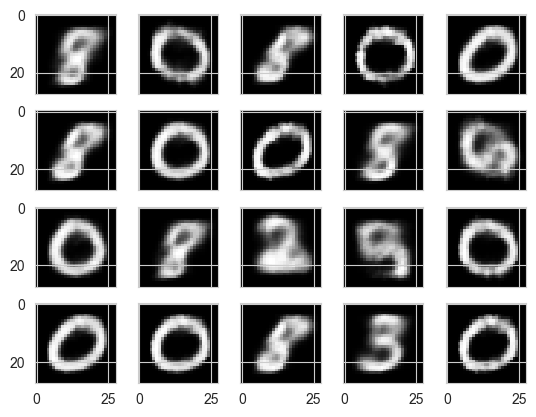

In [24]:
import matplotlib.pyplot as plt

rows, cols = 4, 5
fig, ax = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row')

for row in range(rows):
    for col in range(cols):
        ax[row, col].imshow(digitos[row + 4 * col], interpolation='nearest', cmap="Greys_r")

plt.show()

En general, se alcanzó una calidad en el lado bajo de calidad aceptable (al menos para mi). Son pocas las imágenes en donde cuesta ver que número es el correspondiente.

### 2.4 Evaluar datos sintéticos con clasificador (4 puntos)

Considerando los 20 ejemplos creados en 2.3, aplique el clasificador entrenado en 2.1 para identificar las clases. Comente los resultados.

Si existiera un desbalance en las clases que influye negativamente en las métricas de evaluación, ¿se podrían utilizar estos ejemplos para hacer aumento de datos? Justifique su respuesta en función de los resultados obtenidos al aplicar el clasificador.

RESPUESTA:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


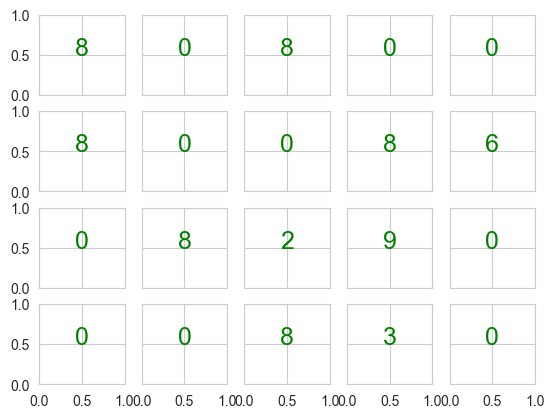

In [25]:
Y_preds = model.predict(np.array(digitos)).argmax(axis=-1)

rows, cols = 4, 5
fig, ax = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row')

for row in range(rows):
    for col in range(cols):
        ax[row, col].text(0.5, 0.5, 
                          str(Y_preds[row + 4 * col]),
                          color="green",
                          fontsize=18, 
                          ha='center')

plt.show()

Como se aprecia, el Vae generó imagenes de una calidad decente, por lo que el modelo anterior pudo predecir (en general) bien el número que representan. Quizás si se logra hacer que todos los datos generados por el VAE sean de buena calidad, entonces sería factible pasar los datos generados por el VAE por el modelo. Sin embargo, en este caso en particular no noto que la calidad de las imagenes sea muy buena, por lo que personalmente optaría por no usar estos datos en el modelo.

# Sección 2: Clasificación de texto (30 puntos)

El conjunto de datos corresponde a diferentes posts realizados en la plataforma X (aka Twitter) y la respectiva clasificación de la emoción asociada a ese post. Las emociones pueden ser: `sadness/tristeza` (0), `joy/alegria` (1), `love/amor` (2), `anger/enojo` (3), `fear/miedo` (4) y `surprise/sorpresa` (5). La tarea que tendran que realizar es codificar los textos de una manera valida, para luego, poder entrenar un modelo de MLP (y posteriormente, un modelo SVM) para clasificar los textos en las emociones correspondientes, evaluar los rendimientos de los modelos y dar hipotesis sobre por qué creen que un modelo es mejor que otro.

El dataset incluye dos columnas:

* Text: Mensaje de X.
* label: Etiqueta con el sentimiento asignado.

Más información en: `https://www.kaggle.com/datasets/nelgiriyewithana/emotions`

## Parte 1: Carga de Datos (4 Puntos)

### 1.1 Importe el dataset y analicelo (4 puntos)

* Indique el número de elementos por clase.

* Construya un nuevo dataset asegurando que cada clase tenga el mismo tamaño que la clase minoritaria. Para ello utilice un muestreo aleatorio simple sobre las clases que poseen mayor cantidad de ejemplos. ¿Qué ventajas y desventajas tiene este enfoque?

**Observación:**

Debe seguir trabajando con el dataset balanceado.

RESPUESTA:

In [25]:
df = pd.read_csv('text.csv') 
df['label'].value_counts()

label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64

Como se aprecia, los datos están muy desbalanceados, por lo que seleccionaremos 14972 datos de cada clase.

In [26]:
df_bal = []

for i in range(6):
    subset = df[df['label'] == i]
    sel = subset.sample(n=14972)
    df_bal.append(sel)

df = pd.concat(df_bal)

In [27]:
df['label'].value_counts()

label
0    14972
1    14972
2    14972
3    14972
4    14972
5    14972
Name: count, dtype: int64

Ahora los datos están más balanceados. Es conveniente hacer esto ya que los datos balanceados es una característica muy deseable en un dataset. Sin embargo, cuando el desbalance es muy alto, al realizar este procedimiento se estarán perdiendo muchos datos, lo que no es muy conveniente.

## Parte 2: Preprocesamiento (6 Puntos)
Remoción de stopwords, codificación mediante count vectorizer y TF-IDF y generación de conjuntos train y test.

Es importante notar que algunas características del texto, como la longitud de sentencias y frecuencia de palabras, dificultan el proceso de entrenamiento de un modelo de clasificación. Por lo mismo, es necesario realizar un preprocesamiento que permita codificar el texto para entrenar modelos. Para esto, se busca que utilicen diferentes tipos de codificación como `TF-IDF` y `Bag-of-Words(BOW)`. Ambos métodos, ya implementados en sklearn, se encargan de construir una representación vectorial para cada sentencia dentro de un corpus (columna con mensajes).

Posteriormente, para cada una de estas codificaciones, deberá entrenar modelos basados en MLP y SVM para clasificar los textos en las emociones correspondientes y evaluar sus rendimientos.

**Observaciones**

* A continuación, se dejan los enlaces de sklearn para trabajar con los métodos TF-IDF y BOW:
1. TF-IDF:  https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
2. BOW: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

* Para ambas codificaciones, se recomienda utilizar un máximo de 5,000 features (para reducir tiempo de entrenamiento) y remover las stopwords del idioma correspondiente al utilizado en el dataset. `Hint: esto se puede realizar mediante los parametros de las funciones presentadas anteriormente`.

### 2.1 Bag of Words (BOW) (2 puntos)

Utilizando Bag-of-Words, obtenga las representaciones vectoriales de los mensajes de la columna `text`.

RESPUESTA:

In [28]:
vec = CountVectorizer(stop_words='english', max_features=5000)
bow = vec.fit_transform(df['text'])

### 2.2 TF-IDF (2 puntos)

Utilizando TF-IDF, obtenga las representaciones vectoriales de los mensajes de la columna `text`.

RESPUESTA:

In [29]:
vec = TfidfVectorizer(stop_words='english', max_features=5000)
tf = vec.fit_transform(df['text'])
#tf.fit(df['text'])

### 2.3 División de datos para cada encoding (2 puntos)

Divida los datos de cada una de vectorizaciones en `train` y `test`, con un tamaño de `85%` y `15%`, respectivamente. Para esto, debera utilizar la funcion `train_test_split` de `sklearn` con un `random_state=42` (recuerde mantener una proporcion balanceada de las clases).

**Observación**

Para mantener el balance de clases al aplicar `train_test_split` puede utilizar el parámetro `stratify`.

RESPUESTA:

In [30]:
bow_x_train, bow_x_test, bow_y_train, bow_y_test = train_test_split(bow.toarray(), df['label'], test_size=0.15, train_size=0.85, random_state=42, stratify=df['label'])

In [31]:
tf_x_train, tf_x_test, tf_y_train, tf_y_test = train_test_split(tf.toarray(), df['label'], test_size=0.15, train_size=0.85, random_state=42, stratify=df['label'])

## Parte 3: Entrenamiento clasificador MLP (8 puntos)

En esta parte, se busca que usted entrene un modelo de MLP para clasificar los textos en las emociones correspondientes.

**Observación**

Se recomienda trabajar con **MLPClassifier**.

Más información en https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

### 3.1 MLP + BOW (3 puntos)

* Entrene un clasificador MLP utilizando la representación de texto obtenida con Bag-of-Words. Considere 3 capas ocultas de 30 a 50 neuronas cada una, con activación `relu` y 50 iteraciones.

* Utilizando el conjunto de test, calcule las métricas F1-score, precision y recall para cada clase. Comente.

* Grafique la matríz de confusión. Comente.

**Observación**

El proceso de entrenamiento puede tardar entre 1 y 3 minutos, dependiendo del número de neuronas definidas.

RESPUESTA:

Usaré 40 neuronas por capa

In [32]:
clf = MLPClassifier(max_iter=50, activation='relu', hidden_layer_sizes=(3, 40, 40 ,40)).fit(bow_x_train, bow_y_train)

c:\Users\Panorámica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
pred = clf.predict(bow_x_test)

In [34]:
print("Test Accuracy : {}".format(accuracy_score(bow_y_test, pred)))
print("\nClassification Report : ")
print(classification_report(bow_y_test, pred))

Test Accuracy : 0.8795547309833024

Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      2245
           1       0.85      0.83      0.84      2246
           2       0.87      0.93      0.90      2246
           3       0.90      0.88      0.89      2246
           4       0.88      0.83      0.86      2246
           5       0.88      0.96      0.92      2246

    accuracy                           0.88     13475
   macro avg       0.88      0.88      0.88     13475
weighted avg       0.88      0.88      0.88     13475



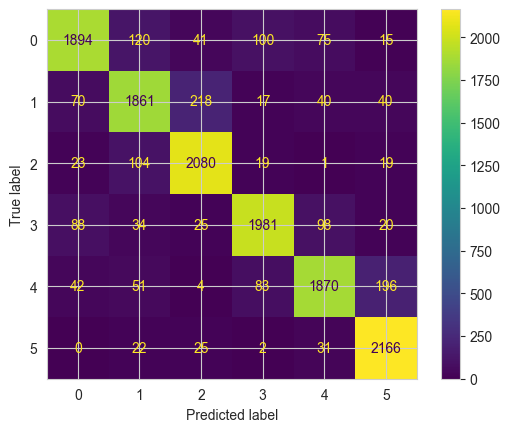

In [35]:
cm = confusion_matrix(bow_y_test, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

Se obtuvo un buen ajuste en cada una de las clases (precisión sobre 80%). Antes había cometido un error y mandé los datos sin balancear y la precisión subió considerablemente.

### 3.2 MLP + TF-IDF (3 puntos)

* Entrene un clasificador MLP utilizando la representación de texto obtenida con TF-IDF. Considere 3 capas ocultas de 30-50 neuronas cada una, con activación `relu` y 50 iteraciones.

* Utilizando el conjunto de test, calcule las métricas F1-score, precision y recall para cada clase. Comente.

* Grafique la matríz de confusión. Comente.

RESPUESTA:

In [36]:
clf = MLPClassifier(max_iter=50, activation='relu', hidden_layer_sizes=(3, 40, 40 ,40)).fit(tf_x_train, tf_y_train)
pred = clf.predict(tf_x_test)
print("Test Accuracy : {}".format(accuracy_score(tf_y_test, pred)))
print("\nClassification Report : ")
print(classification_report(tf_y_test, pred))

c:\Users\Panorámica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Test Accuracy : 0.8771057513914656

Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      2245
           1       0.86      0.81      0.83      2246
           2       0.89      0.91      0.90      2246
           3       0.89      0.89      0.89      2246
           4       0.87      0.85      0.86      2246
           5       0.89      0.96      0.92      2246

    accuracy                           0.88     13475
   macro avg       0.88      0.88      0.88     13475
weighted avg       0.88      0.88      0.88     13475



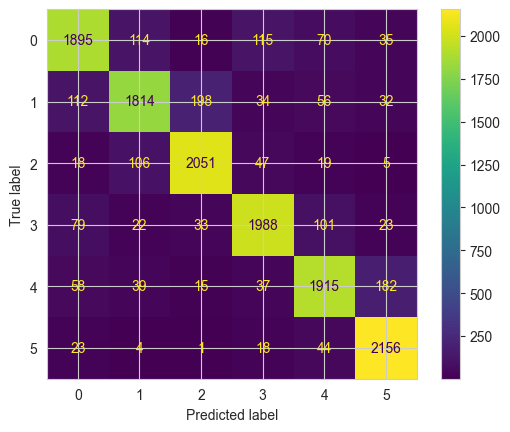

In [37]:
cm = confusion_matrix(tf_y_test, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

Igualmente se dieron buenos resultados, con precisión individual (y total) bien alta.

### 3.3 Analisis de resultados - Comparación de encoders (2 puntos)

En este caso, si un modelo con cierto encoding funciono mejor que otro, ¿Por qué creen que fue asi? ¿Que ventajas/desventajas tiene cada uno de los encodings?

RESPUESTA:

Ambos encodings dieron resultados muy similares, sin embargo, TF-IDF resultó un poco mejor. Según [referencia](https://medium.com/@prateekgaurav/nlp-zero-to-hero-part-1-introduction-bow-tf-idf-word2vec-c1b11ed77a2#:~:text=The%20boW%20is%20often%20used,document%20and%20across%20a%20corpus.), TF-IDF suele ser mejor que BOW ya que este último es simplemente contar las apariciones de palabras en un texto y TF-IDF considera la importancia de las palabras en el texto. Sin embargo, TF-IDF al ser más complejo resulta computacionalmente más caro.

## Parte 4: Entrenamiento clasificador SVM (9 puntos)

### 4.1 Entrenamiento modelo SVM (7 puntos)

* **Considerando la vectorizacion que le haya dado mejores resultados en la Parte 3**, entrene un modelo SVM para clasificar los textos en las emociones correspondientes. Para esto, considere los kernels `linear`, `poly` y `rbf`.

* Utilizando el conjunto de test, calcule las métricas F1-score, precision y recall para cada clase. Compare los resultados obtenidos al trabajar con los 3 kernels.

**Observación**

El proceso de entrenamiento al trabajar con los kernels `poly` y `rbf` puede tardar entre 5 y 10 minutos.

RESPUESTA:

El código se me demoraba mucho (más de una hora), por lo que decidí reducir la cantidad de datos.

In [38]:
df_bal = []

for i in range(6):
    subset = df[df['label'] == i]
    sel = subset.sample(n=1000) #Elegir 1000 datos por clase
    df_bal.append(sel)

df_new = pd.concat(df_bal)

In [39]:
vec = TfidfVectorizer(stop_words='english', max_features=5000)
tf = vec.fit_transform(df_new['text'])

In [40]:
tf_x_train, tf_x_test, tf_y_train, tf_y_test = train_test_split(tf.toarray(), df_new['label'], test_size=0.15, train_size=0.85, random_state=42, stratify=df_new['label'])

In [41]:
from sklearn.svm import LinearSVC

linear = make_pipeline(StandardScaler(),  LinearSVC())
linear.fit(tf_x_train, tf_y_train)
linear_pred = linear.predict(tf_x_test)

c:\Users\Panorámica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [42]:
print("Test Accuracy : {}".format(accuracy_score(tf_y_test, linear_pred)))
print("\nClassification Report : ")
print(classification_report(tf_y_test, linear_pred))

Test Accuracy : 0.6622222222222223

Classification Report : 
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       150
           1       0.62      0.61      0.62       150
           2       0.74      0.60      0.66       150
           3       0.68      0.65      0.67       150
           4       0.61      0.71      0.66       150
           5       0.70      0.68      0.69       150

    accuracy                           0.66       900
   macro avg       0.67      0.66      0.66       900
weighted avg       0.67      0.66      0.66       900



In [43]:
poly = make_pipeline(StandardScaler(), SVC(kernel='poly'))
poly.fit(tf_x_train, tf_y_train)
poly_pred = poly.predict(tf_x_test)

print("Test Accuracy : {}".format(accuracy_score(tf_y_test, poly_pred)))
print("\nClassification Report : ")
print(classification_report(tf_y_test, poly_pred))

Test Accuracy : 0.21333333333333335

Classification Report : 
              precision    recall  f1-score   support

           0       0.19      0.59      0.29       150
           1       0.18      0.04      0.07       150
           2       0.12      0.03      0.05       150
           3       0.27      0.29      0.28       150
           4       0.30      0.23      0.26       150
           5       0.19      0.09      0.12       150

    accuracy                           0.21       900
   macro avg       0.21      0.21      0.18       900
weighted avg       0.21      0.21      0.18       900



In [44]:
rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
rbf.fit(tf_x_train, tf_y_train)
rbf_pred = rbf.predict(tf_x_test)

print("Test Accuracy : {}".format(accuracy_score(tf_y_test, rbf_pred)))
print("\nClassification Report : ")
print(classification_report(tf_y_test, rbf_pred))

Test Accuracy : 0.5644444444444444

Classification Report : 
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       150
           1       0.41      0.75      0.53       150
           2       0.60      0.58      0.59       150
           3       0.67      0.55      0.60       150
           4       0.68      0.48      0.56       150
           5       0.63      0.47      0.54       150

    accuracy                           0.56       900
   macro avg       0.60      0.56      0.57       900
weighted avg       0.60      0.56      0.57       900



### 4.2 Analisis de resultados - Comparación de kernels (2 puntos).

¿Cómo funcionaron los kernels? ¿Por qué cree que fue asi?

RESPUESTA:

Esto puede explicarse ya que reduje considerablemente la cantidad de datos, por lo que modelos más complejos tendrán un peor desempeño que los más sencillos como el lineal. Sin embargo, según según [referencia](https://data-flair.training/blogs/svm-kernel-functions/), polinomial es popular en procesamiento de imagenes y rbf es también una buena opción para este trabajo. De esta forma, si hubiera usado todos los datos, quizas polinomial hubiera destacado.


## Parte 5: Comparar resultados de MLP y SVM (3 puntos).

¿Qué modelo entregó mejores resultados? ¿Por qué cree que fue asi?

RESPUESTA:

Como expliqué, los resultados de SVM probablemente se vieron afectados por la poca cantidad de datos que pude usar. De todas formas, MLP resultó ser muy preciso y muy eficiente en cuanto a tiempo. De esta manera, considero que para el contexto del problema (y las habilidades computacionales de mi computador), resulta mucho mejor usar MLP. Esto puede explicarse ya que MLP es un modelo bien sencillo y eficiente y porque probablemente los datos no eran tan complejos como para necesitar un modelo más avanzado.